# **트랜잭션 격리 수준**

- 복수개의 트랜잭션이 한번에 처리될 때, 특정 트랜잭션이 변경하거나 조회하고 있는 데이터에 대해서 다른 트랜잭션에 대해 조회 허용 여부를 결정하는 것.

<br>

**트랜잭션 격리 수준은 아래와 같이 4개로 구분.**

- SERIALIZABLE (직렬화 가능)
- REPEATABLE READ (반복 가능한 읽기)
- READ COMMITTED (커밋된 읽기)
- READ UNCOMITTED (커밋되지 않은 읽기)

- 밑으로 갈수록 격리 수준이 낮아지며, 동시 처리 성능이 높아진다
-  반면 위로 갈수록 격리 수준이 높아지며, 동시 처리 성능은 낮아지지만 데이터 부정합 문제가 발생할 확률이 줄어든다.
  -  즉, 데이터 정합성과 성능은 반비례한다.



# **트랜잭션 격리 수준에 따라 발생할 수 있는 문제점**

**더티 리드 (Dirty Read)**

- 더티 리드는 특정 트랜잭션에 이해 데이터가 변경되었지만, 아직 커밋되지 않은 상황에서 다른 트랜잭션이 해당 변경 사항을 조회할 수 있는 문제를 말한다.

- 이 문제는 트랜잭션 A가 데이터를 변경하고 커밋하지 않은 시점에 트랜잭션 B가 변경된 데이터를 읽어온 상황에서, 트랜잭션 A가 변경 내용을 커밋하지 않고 롤백한 상황에서 치명적이다. 트랜잭션 B는 무효가 된 값을 읽고 처리하므로 문제가 발생한다.

**반복 불가능한 조회 (Non-Repeatable Read)**
- 같은 트랜잭션 내에서 같은 데이터를 여러번 조회했을 때 읽어온 데이터가 다른 경우를 의미한다.

**팬텀 리드 (Phantom Read)**
- Non-Repeatable Read의 한 종류로 조회해온 결과의 행이 새로 생기거나 없어지는 현상이다.



# **SERIALIZABLE**

- 특정 트랜잭션이 사용중인 테이블의 모든 행을 다른 트랜잭션이 접근할 수 없도록 잠근다.
- 가장 높은 데이터 정합성을 갖으나, 성능은 가장 떨어진다.
- 이 격리 수준에서는 단순한 SELECT 쿼리가 실행되더라도, 데이터베이스 락이 걸려 다른 트랜잭션에서 데이터에 접근할 수 없게된다.

# **REPEATABLE READ**

- 특정 행을 조회시 항상 같은 데이터를 응답하는 것을 보장하는 격리 수준이다.
- SERIALIZABLE과 다르게 행이 추가되는 것을 막지는 않는다.
- 이로 인해 팬텀 리드 현상이 발생할 수 있다.

- MySQL의 InnoDB엔진의 기본 격리 수준이 REPEATABLE READ.

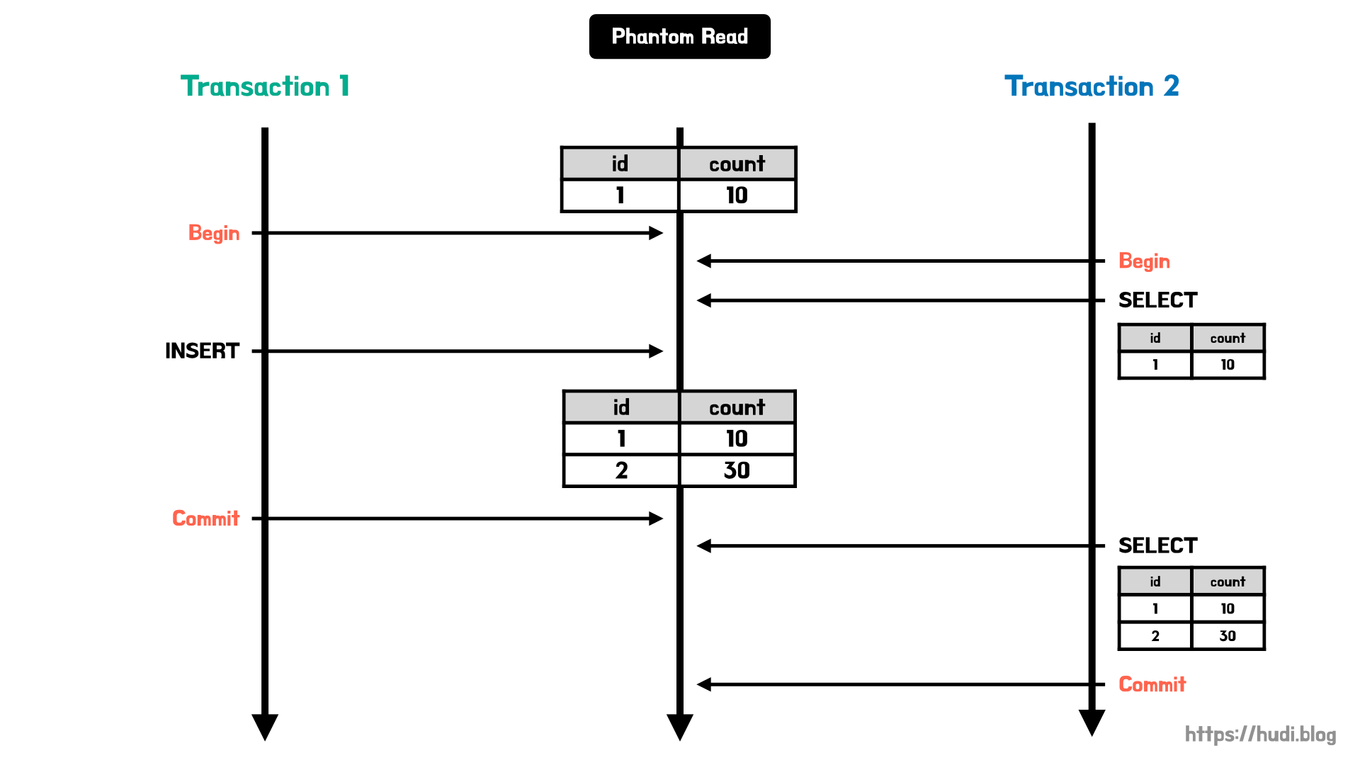

발생할 수 있는 문제

- Phantom Read


# **READ COMMITTED**

- 커밋이 완료된 트랜잭션의 변경사항만 다른 트랜잭션에서 조회할 수 있도록 허용하는 격리 수준.
- 특정 트랜잭션이 이루어지는 동안 다른 트랜잭션은 해당 데이터에 접근할 수 없다.
-  가장 많이 사용되는 격리 수준이며, 오라클 등 에서 기본값으로 설정.

- 특정 트랜잭션에서 데이터가 변경되었으나, 아직 커밋되지 않은 상태라면 다른 트랜잭션에서는 해당 데이터에 접근했을 때 트랜잭션 시작 전 데이터를 읽어온다.
- 커밋이 된 이후에서야 변경된 데이터 값을 읽어올 수 있다.
- 이런 특성으로 팬텀 리드와 반복 불가능한 조회 문제가 발생한다.



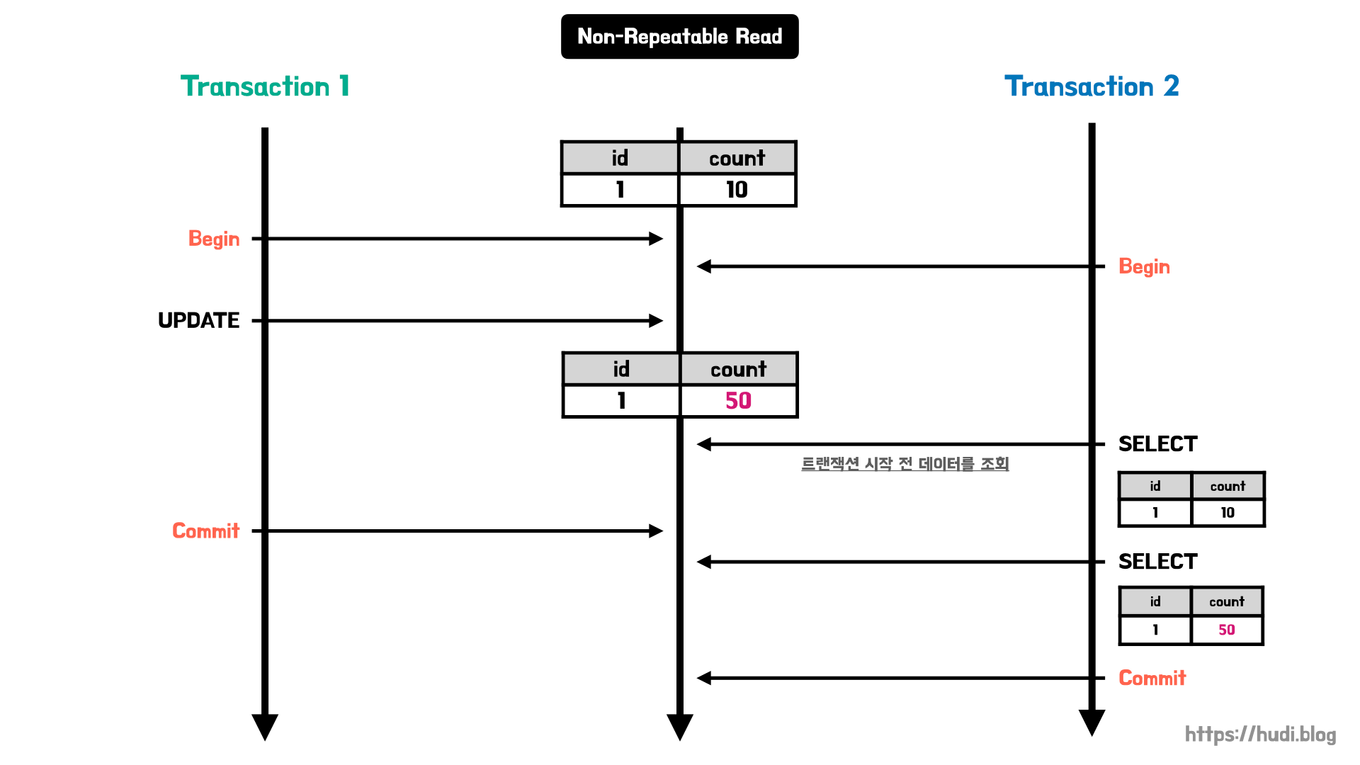

발생할 수 있는 문제
- Phantom Read
- Non-Repeatable Read

# **READ UNCOMMITTED**
- 커밋이 되지 않은 트랜잭션의 데이터 변경 내용을 다른 트랜잭션이 조회하는 것을 허용하는 격리 수준.
- 데이터 부정합 문제가 발생할 확률이 높지만, 성능은 가장 빠르다.
- 데이터를 어림잡아 집계하는 등의 연산에서 사용하면 좋다.



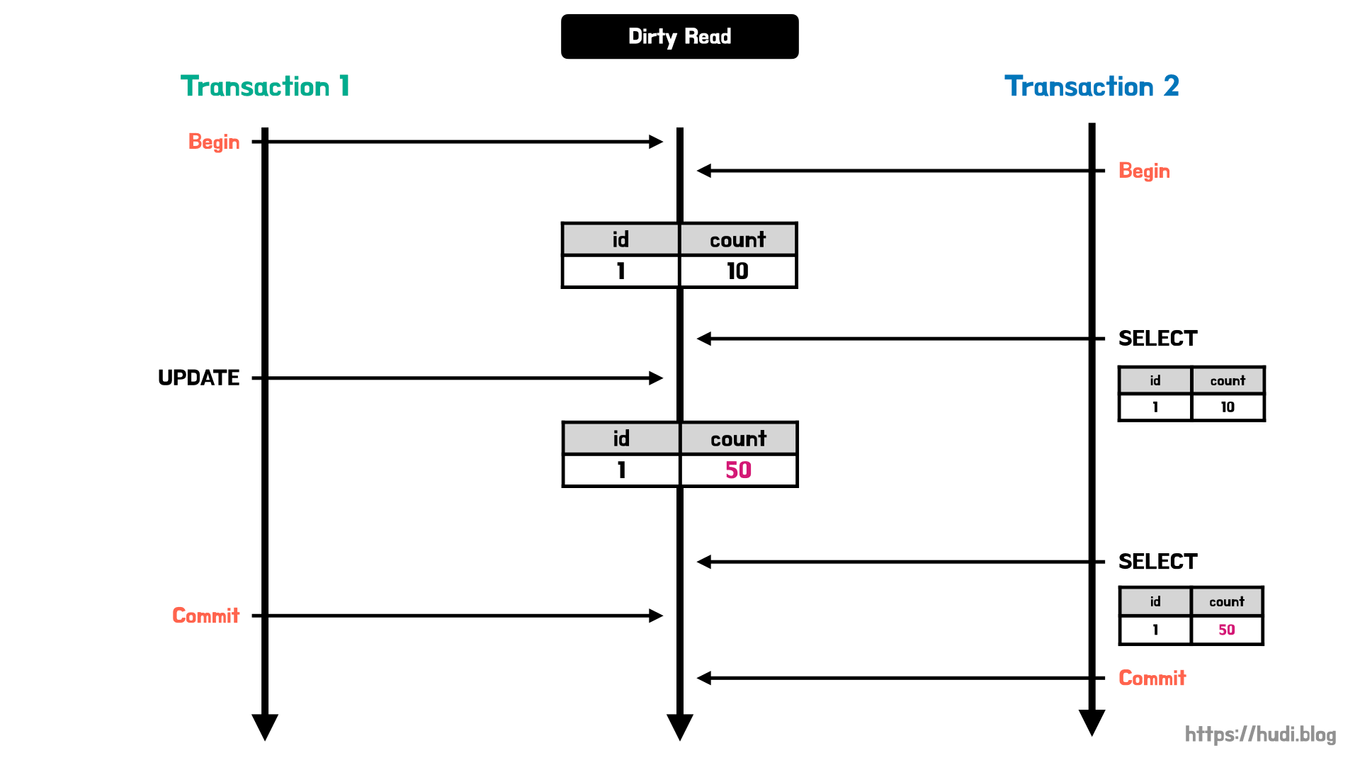

- 롤백 상황에서 큰 문제가 발생한다.

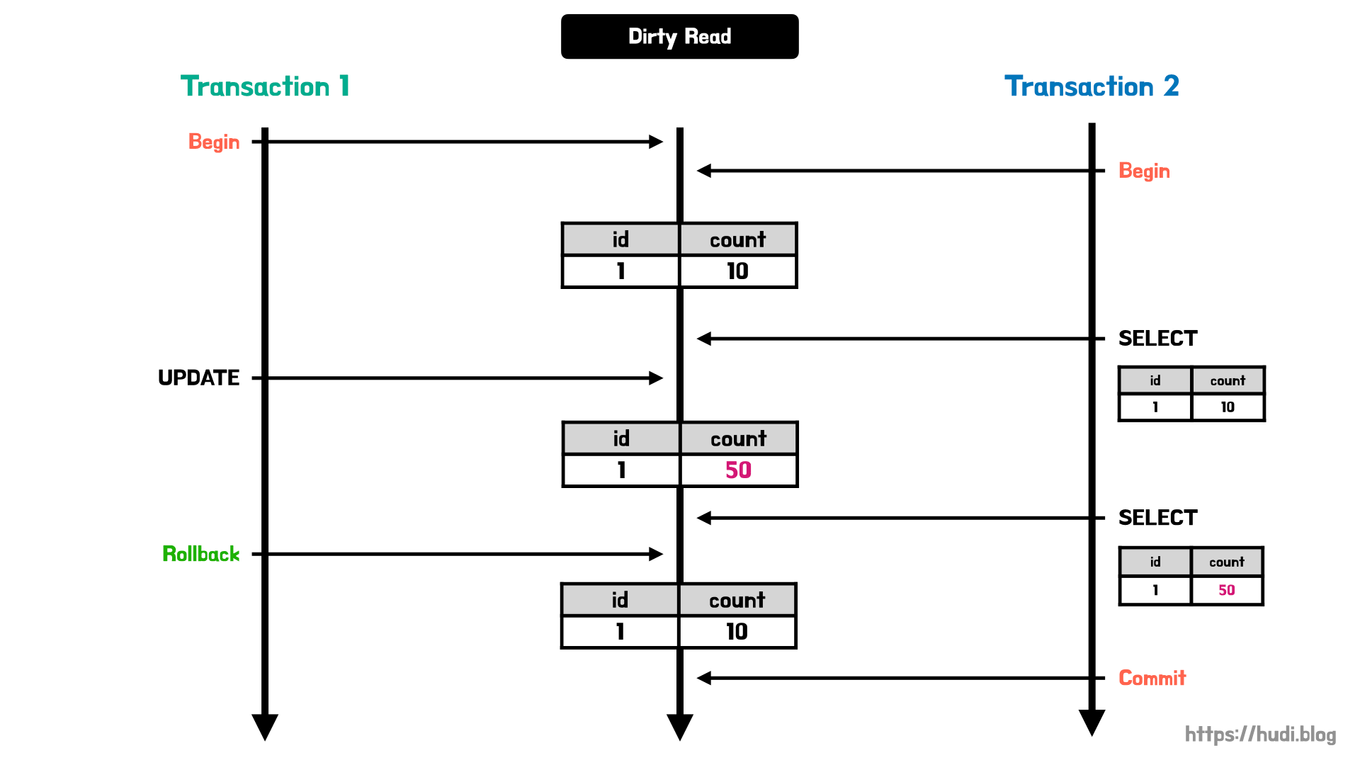

발생할 수 있는 문제
- Dirty Read
- Non-Repeatable Read
- Phantom Read